##TASK 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_train = pd.read_csv('/content/occupancy_train.txt', sep=',')
df_test = pd.read_csv('/content/occupancy_test.txt', sep=',')

df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
X = df_train[['Humidity','Light', 'HumidityRatio']]
Y = df_train['Occupancy']

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Y_train_pred = model.predict(X)
Y_test_pred = model.predict(df_test[['Humidity','Light', 'HumidityRatio']])

[0 0 1 ... 1 1 1]


In [ ]:
trainacc = accuracy_score(Y, Y_train_pred)
testacc = accuracy_score(df_test['Occupancy'], Y_test_pred)
print("Training Accuracy:", trainacc)
print('Testing Accuracy:',testacc)

Training Accuracy: 0.9917720741741373
Testing Accuracy: 0.9572232645403377


In [ ]:
acc = []
for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X,Y)
  Y_pred = model.predict(df_test[['Humidity','Light', 'HumidityRatio']])
  accuracy = accuracy_score(df_test['Occupancy'], Y_pred)
  acc.append(accuracy)

print([f"{a:.2f}" for a in acc])
print(f'Highest Accuracy: {max(acc)}')
print(f'K picked: {acc.index(max(acc))}')

['0.94', '0.93', '0.96', '0.94', '0.96', '0.95', '0.96', '0.96', '0.96']
Highest Accuracy: 0.9647279549718574
K picked: 8


In [ ]:
# final training and testing with k = 8
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X,Y)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_train_pred = model.predict(X)
y_test_pred = model.predict(df_test[['Humidity','Light', 'HumidityRatio']])
train_acc = accuracy_score(y_train_pred, Y)
test_acc = accuracy_score(y_test_pred, df_test['Occupancy'])
print("Training Accuracy:", train_acc)
print('Testing Accuracy:',test_acc)

Training Accuracy: 0.9891931720496132
Testing Accuracy: 0.9613508442776736


##Task 2

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum()

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
X = df.drop(columns=['Id', 'Species']).to_numpy(dtype=float)
Y = df['Species']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def calc(x,y):
  return np.sum((x - y) ** 2 / (x + y + 1e-10))

In [ ]:
def knn_predict(X_train, y_train, x_test, k=3):
    distances = []
    for i, x_train in enumerate(X_train):
        dist = calc(x_test, x_train)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    return Counter(k_nearest).most_common(1)[0][0]

"""
def knn_predict(X_train, y_train, x_test, k=3):
    # Compute distances
    distances = [chi_square_distance(x_test, x) for x in X_train]
    # Get indices of k nearest neighbors
    k_idx = np.argsort(distances)[:k]
    # Majority vote
    return Counter(y_train[k_idx]).most_common(1)[0][0]
"""

'\ndef knn_predict(X_train, y_train, x_test, k=3):\n    # Compute distances\n    distances = [chi_square_distance(x_test, x) for x in X_train]\n    # Get indices of k nearest neighbors\n    k_idx = np.argsort(distances)[:k]\n    # Majority vote\n    return Counter(y_train[k_idx]).most_common(1)[0][0]\n'

In [ ]:
k = 3
y_pred = np.array([knn_predict(X_train, y_train, x, k) for x in X_test])

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


##Task 3

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [32]:
df.shape

(1000, 26)

In [33]:
df['Level'].value_counts()

,count
Level,
High,365
Medium,332
Low,303


In [34]:
df.isnull().sum()

# no missing values

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [35]:
categorical = df.select_dtypes(include='object')
print(categorical.columns)
print(df['Level'].unique())

Index(['Patient Id', 'Level'], dtype='object')
['Low' 'Medium' 'High']


In [36]:
df = df.drop(columns=["index", "Patient Id"])

In [37]:
le = LabelEncoder()
df["Level"] = le.fit_transform(df["Level"])
print(df['Level'].unique())

[1 2 0]


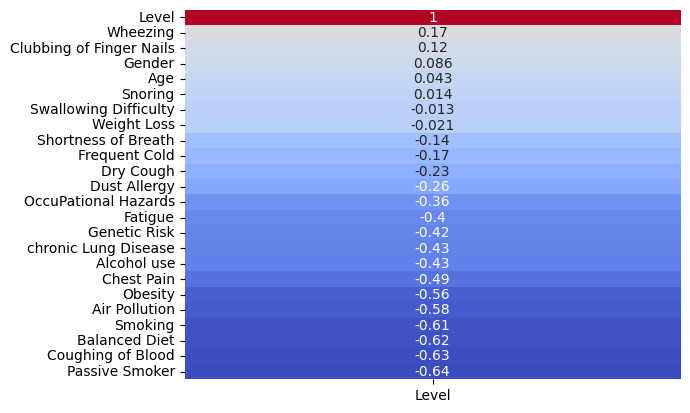

In [38]:
corr_matrix = df.corr(method="pearson")
target_corr = corr_matrix[["Level"]].sort_values(by="Level", ascending=False)
sns.heatmap(target_corr, annot=True, cmap="coolwarm", cbar=False)
plt.show()

In [39]:
df.describe()
# feature scaling is required

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.96700
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.83463
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.00000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.00000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.00000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.00000


In [40]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Level"]))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(X_train)
y_pred_val = knn.predict(X_val)
y_pred_test = knn.predict(X_test)

print("Training:", accuracy_score(y_train, y_pred))
print("Validation:", accuracy_score(y_val, y_pred_val))
print("Testing:", accuracy_score(y_test, y_pred_test))

Training: 0.9964285714285714
Validation: 0.9833333333333333
Testing: 0.98


In [46]:
metrics = ['euclidean', 'manhattan']
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
  knn.fit(X_train, y_train)

  acc_train = accuracy_score(y_train, knn.predict(X_train))
  acc_val = accuracy_score(y_val, knn.predict(X_val))
  acc_test = accuracy_score(y_test, knn.predict(X_test))

  print(f"Metric: {metric}")
  print(f"Training Accuracy: {acc_train}")
  print(f"Validation Accuracy: {acc_val}")
  print(f"Testing Accuracy: {acc_test}")
  print()


Metric: euclidean
Training Accuracy: 0.9964285714285714
Validation Accuracy: 0.9833333333333333
Testing Accuracy: 0.98

Metric: manhattan
Training Accuracy: 1.0
Validation Accuracy: 1.0
Testing Accuracy: 1.0

